In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

<BarContainer object of 66 artists>

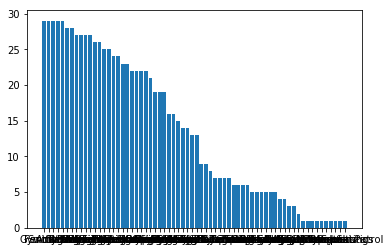

In [19]:
x = data.groupby('Sport').Year.nunique().sort_values(ascending = False)
plt.bar(x.index, x)
plt.

[]

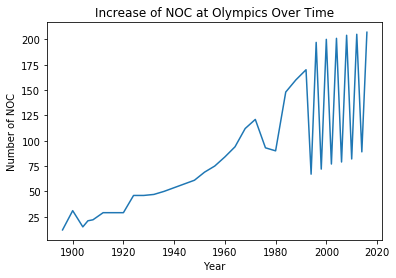

In [3]:
x = pd.DataFrame(data.groupby('Year').NOC.nunique()).reset_index()
plt.xlabel('Year')
plt.ylabel('Number of NOC')
plt.title('Increase of NOC at Olympics Over Time')
plt.plot(x['Year'], x['NOC'])
plt.plot()

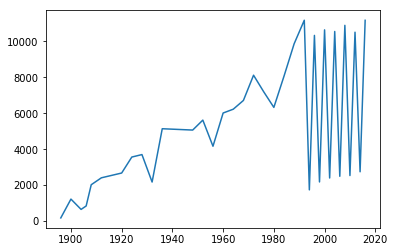

In [12]:
y = pd.DataFrame(data.groupby('Year').ID.nunique()).reset_index()
plt.plot(y['Year'],y['ID'])
plt.show()

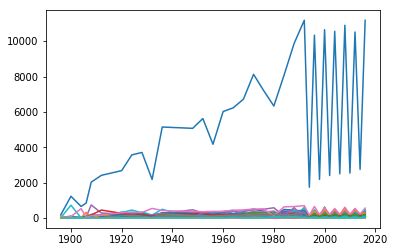

In [13]:
z = pd.DataFrame(data.groupby(['Year','NOC']).ID.nunique()).reset_index()

a = z.pivot(index='Year', columns = 'NOC', values='ID').fillna(0)
plt.plot(a)
plt.plot(y['Year'],y['ID'])
plt.show()

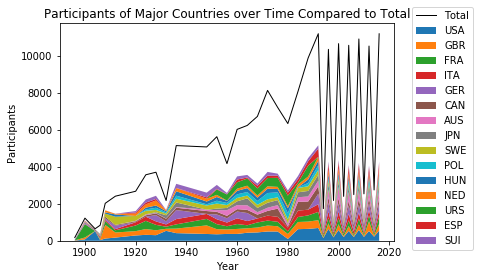

In [93]:
k = pd.DataFrame(data.groupby(['Year','NOC']).ID.nunique()).reset_index()

a = k.pivot(index='Year', columns = 'NOC', values='ID').fillna(0)
a_sub = a.sum(axis=0).sort_values(ascending=False).head(15).index.values
a_part = a.loc[:, a_sub]

plt.stackplot(a_part.index, np.transpose(a_part), labels = a_part.columns)
plt.plot(y['Year'], y['ID'], linewidth=1, color='black', label = "Total")
plt.legend(bbox_to_anchor=(1.25,1.1))
plt.xlabel('Year')
plt.ylabel('Participants')
plt.title('Participants of Major Countries over Time Compared to Total')
plt.show()

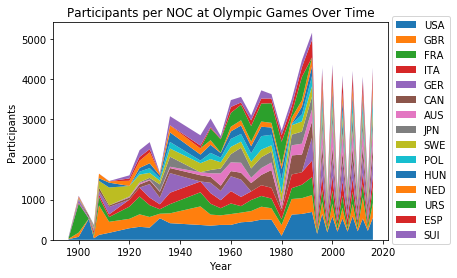

In [94]:
plt.stackplot(a_part.index, np.transpose(a_part), labels = a_part.columns)
plt.legend(bbox_to_anchor=(1.2,1.05))
plt.xlabel('Year')
plt.ylabel('Participants')
plt.title('Participants per NOC at Olympic Games Over Time')
plt.show()

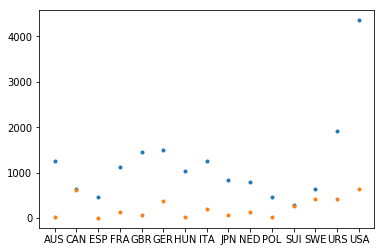

In [174]:
a = data[data['Year'] >= 1994]
a2 = a.groupby('Season').Event.unique()
a2.head()

summer = a2.Summer
winter = a2.Winter

summerevents = data[data.Event.isin(summer) == True]
winterevents = data[data.Event.isin(winter) == True]

d = pd.merge(summerevents.groupby('NOC').Medal.count().reset_index(), winterevents.groupby('NOC').Medal.count().reset_index(), on = 'NOC')
d.columns = ['NOC', 'SummerMedals', 'WinterMedals']
d = d.set_index('NOC')

c = d[d.index.isin(a_part) == True]
plt.plot(c, '.')
plt.show()

In [ ]:
data.info()

In [ ]:
noc.head()

In [ ]:
noc.info()

In [ ]:
data.loc[:,'Medal'].head()

In [ ]:
print(data.groupby(['NOC']).Medal.count().sort_values(ascending=False))

In [ ]:
print(data.groupby(['Team','Medal']).Medal.count().sort_values(ascending = False))

In [175]:
men = data.loc[data['Sex'] == 'M',:]
women = data.loc[data['Sex'] == 'F',:]

In [176]:
print(men.groupby('Medal').Event.count())
print(women.groupby('Medal').Event.count())

Medal
Bronze    9524
Gold      9625
Silver    9381
Name: Event, dtype: int64
Medal
Bronze    3771
Gold      3747
Silver    3735
Name: Event, dtype: int64


In [177]:
g1 = men.groupby('Year').Medal.count()
g2 = women.groupby('Year').Medal.count()

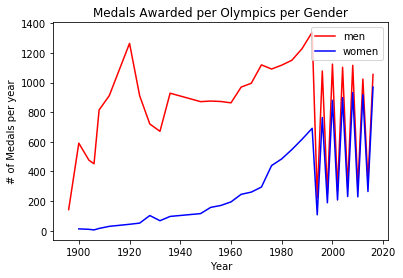

In [187]:
plt.plot(g1, color='red')
plt.plot(g2, color = 'blue')
plt.legend(loc = 'upper right', labels = ('men', 'women'))
plt.xlabel('Year')
plt.ylabel('# of Medals per year')
plt.title('Medals Awarded per Olympics per Gender')
plt.show()

In [186]:
print(data[data['Year'] == 1998].Season.head(1))

68    Winter
Name: Season, dtype: object


We see that years for winter olympics after 1994 (when the olympics split to winter/summer) have significantly lower medal counts.

In [185]:
print(data[data['Year'] >= 1994].groupby('Season')[['Event','Medal']].count())

        Event  Medal
Season              
Summer  81254  11859
Winter  24549   2892


In [188]:
tb = data.groupby('Event').Medal.count().sort_values(ascending = False)
print(tb.head(10), '\n\n\n')
print(tb.tail(10))

Event
Football Men's Football             1269
Ice Hockey Men's Ice Hockey         1230
Hockey Men's Hockey                 1050
Water Polo Men's Water Polo          866
Rowing Men's Coxed Eights            730
Gymnastics Men's Team All-Around     713
Basketball Men's Basketball          687
Handball Men's Handball              588
Volleyball Men's Volleyball          495
Hockey Women's Hockey                478
Name: Medal, dtype: int64 



Event
Motorboating Mixed A-Class (Open)                     1
Shooting Men's Unknown Event                          0
Archery Men's Unknown Event                           0
Art Competitions Mixed Architecture, Unknown Event    0
Art Competitions Mixed Literature, Unknown Event      0
Art Competitions Mixed Music, Unknown Event           0
Art Competitions Mixed Sculpturing, Unknown Event     0
Art Competitions Mixed Unknown Event                  0
Sailing Mixed 18 foot                                 0
Art Competitions Mixed Painting, Unknown Eve

In [190]:
print(tb[tb <= 3].head(10))

Event
Archery Men's Sur La Perche a La Herse                           3
Athletics Men's 2,590 metres Steeplechase                        3
Athletics Men's 2,500 metres Steeplechase                        3
Archery Men's Au Cordon Dore, 33 metres                          3
Archery Men's Continental Style                                  3
Athletics Men's 10 mile Walk                                     3
Athletics Men's 1,500 metres Walk                                3
Art Competitions Mixed Sculpturing, Reliefs                      3
Art Competitions Mixed Music, Compositions For Solo Or Chorus    3
Athletics Men's Shot Put, Both Hands                             3
Name: Medal, dtype: int64


In [181]:
print(data[data['Year'] >= 1994].Event.nunique())
print(data[data['Year'] >= 1994].Name.nunique())
print(data[data['Year'] >= 1994].ID.nunique())

456
53957
54201


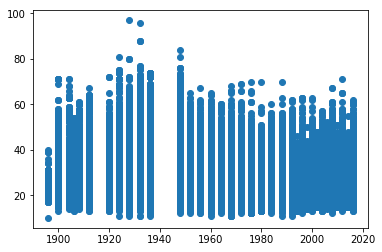

In [182]:
plt.scatter(data['Year'], data['Age'])
plt.show()

In [191]:
print(data[data['Age'] > 45][data['Year'] > 1994])

            ID                                               Name Sex   Age  \
270        140                          William "Bill" Abbott Jr.   M  46.0   
738        422                          Julianne "Anne" Abernathy   F  48.0   
1503       835                       Phillip Maxwell "Phil" Adams   M  50.0   
1504       835                       Phillip Maxwell "Phil" Adams   M  50.0   
3286      1848                   Dadallah Noor Mohamed Al-Bulushi   M  49.0   
3306      1858                                  Fehaid Al-Deehani   M  49.0   
3679      2112                                Abdullah Al-Rashidi   M  48.0   
3680      2112                                Abdullah Al-Rashidi   M  52.0   
5250      2975                   Jlio Antonio de Sourza e Almeida   M  46.0   
5251      2975                   Jlio Antonio de Sourza e Almeida   M  46.0   
5628      3176                             Luis lvarez de Cervera   M  48.0   
5695      3210                                      

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


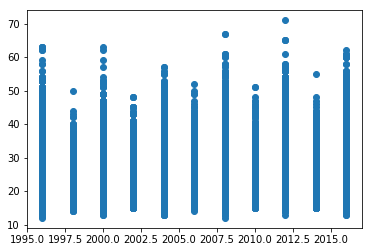

In [192]:
plt.scatter(data[data['Year'] > 1994].Year, data[data['Year'] > 1994].Age)
plt.show()

In [193]:
print(data.groupby('Event').Age.mean())
print(data.groupby('Event').Age.median())

Event
Aeronautics Mixed Aeronautics                          26.000000
Alpine Skiing Men's Combined                           24.100352
Alpine Skiing Men's Downhill                           24.083770
Alpine Skiing Men's Giant Slalom                       23.330452
Alpine Skiing Men's Slalom                             23.523323
Alpine Skiing Men's Super G                            24.536842
Alpine Skiing Women's Combined                         22.800554
Alpine Skiing Women's Downhill                         22.501412
Alpine Skiing Women's Giant Slalom                     22.015609
Alpine Skiing Women's Slalom                           22.033126
Alpine Skiing Women's Super G                          23.109453
Alpinism Mixed Alpinism                                38.812500
Archery Men's Au Chapelet, 33 metres                   36.666667
Archery Men's Au Chapelet, 50 metres                   35.666667
Archery Men's Au Cordon Dore, 33 metres                36.666667
Archery Men's Au Co

In [194]:
age = data.groupby('Event').Age

In [195]:
data.groupby('Name').Medal.count().sort_values(ascending=False)

Name
Michael Fred Phelps, II                            28
Larysa Semenivna Latynina (Diriy-)                 18
Nikolay Yefimovich Andrianov                       15
Edoardo Mangiarotti                                13
Borys Anfiyanovych Shakhlin                        13
Ole Einar Bjrndalen                                13
Takashi Ono                                        13
Sawao Kato                                         12
Aleksey Yuryevich Nemov                            12
Paavo Johannes Nurmi                               12
Birgit Fischer-Schmidt                             12
Natalie Anne Coughlin (-Hall)                      12
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)    12
Ryan Steven Lochte                                 12
Dara Grace Torres (-Hoffman, -Minas)               12
Vra slavsk (-Odloilov)                             11
Viktor Ivanovych Chukarin                          11
Matthew Nicholas "Matt" Biondi                     11
Carl Townsend Osburn   

In [196]:
print(age.mean().head(15))
print(age.median().head(15))
print(age.var().head(15))

Event
Aeronautics Mixed Aeronautics              26.000000
Alpine Skiing Men's Combined               24.100352
Alpine Skiing Men's Downhill               24.083770
Alpine Skiing Men's Giant Slalom           23.330452
Alpine Skiing Men's Slalom                 23.523323
Alpine Skiing Men's Super G                24.536842
Alpine Skiing Women's Combined             22.800554
Alpine Skiing Women's Downhill             22.501412
Alpine Skiing Women's Giant Slalom         22.015609
Alpine Skiing Women's Slalom               22.033126
Alpine Skiing Women's Super G              23.109453
Alpinism Mixed Alpinism                    38.812500
Archery Men's Au Chapelet, 33 metres       36.666667
Archery Men's Au Chapelet, 50 metres       35.666667
Archery Men's Au Cordon Dore, 33 metres    36.666667
Name: Age, dtype: float64
Event
Aeronautics Mixed Aeronautics              26.0
Alpine Skiing Men's Combined               24.0
Alpine Skiing Men's Downhill               24.0
Alpine Skiing Men's Gia

In [197]:
subset = data[data['Year'] >= 1994]
subset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN


In [200]:
d = subset.groupby('NOC').Event.nunique().sort_values(ascending=False)

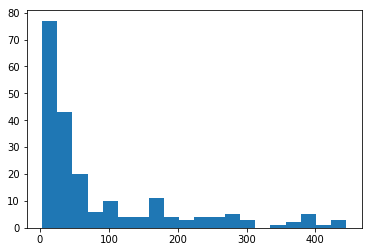

In [201]:
plt.hist(d, bins=20)
plt.show()

It is very apparent that modern first world countries tend to participate in significantly more events than most other countries.

Try looking at how women's role in the olympics improved over time

In [204]:
p1 = women.groupby('Year').Name.nunique()
p1 = pd.DataFrame(p1)
p2 = data.groupby('Year').Name.nunique()
p2 = pd.DataFrame(p2)

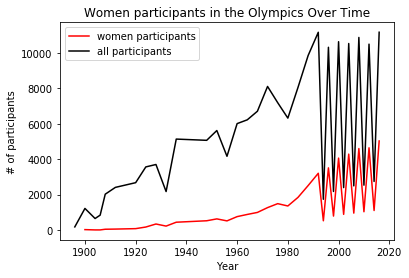

In [205]:
plt.plot(p1, color = 'red')
plt.plot(p2, color = 'black')
plt.legend(loc = 'upper left', labels = ('women participants', 'all participants'))
plt.xlabel('Year')
plt.ylabel('# of participants')
plt.title('Women participants in the Olympics Over Time')
plt.show()


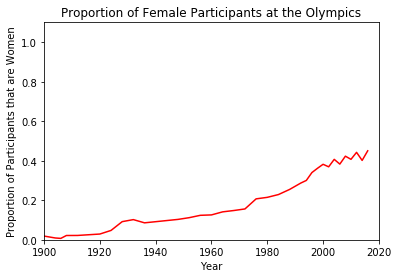

In [206]:
p = p1/p2
plt.plot(p, color = 'red')
plt.axis((1900, 2020, 0, 1.1))
plt.xlabel('Year')
plt.ylabel('Proportion of Participants that are Women')
plt.title('Proportion of Female Participants at the Olympics')
plt.show()

In [207]:
parts = women.groupby(['Year', 'NOC']).Name.nunique()
parts = pd.DataFrame(parts)
parts.unstack(1).fillna(0).apply(sum, 0).sort_values(ascending=False)

      NOC
Name  USA    3744.0
      CAN    2234.0
      GBR    2190.0
      GER    1994.0
      CHN    1951.0
      AUS    1860.0
      JPN    1743.0
      FRA    1668.0
      ITA    1557.0
      RUS    1536.0
      NED    1204.0
      SWE    1136.0
      KOR    1108.0
      POL    1008.0
      HUN    1003.0
      ESP     978.0
      URS     935.0
      BRA     903.0
      ROU     853.0
      UKR     766.0
      SUI     749.0
      AUT     703.0
      NOR     639.0
      NZL     609.0
      BUL     591.0
      FIN     565.0
      GDR     538.0
      FRG     513.0
      BLR     510.0
      GRE     509.0
              ...  
      UAE       7.0
      BOT       7.0
      IRQ       7.0
      MHL       7.0
      QAT       6.0
      ERI       6.0
      STP       6.0
      KSA       5.0
      AFG       5.0
      KOS       5.0
      SOM       5.0
      SAA       5.0
      MTN       5.0
      TLS       5.0
      IVB       5.0
      DJI       5.0
      YEM       4.0
      OMA       4.0
      ROT 